<a href="https://colab.research.google.com/github/wjdolan/DS_Portfolio/blob/main/TSCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


6.341 --> 1.470 --> 1.470 --> 1.470 --> 


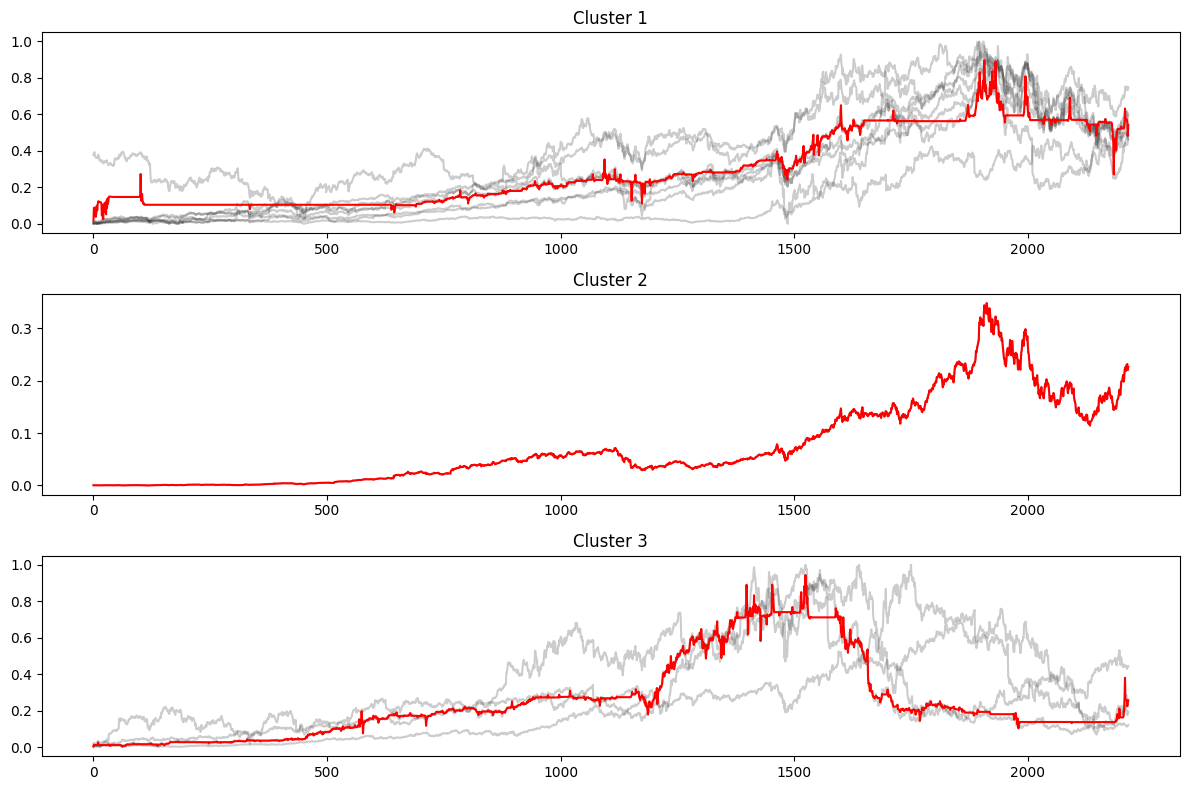

Cluster 1 contains the following stocks:
AAPL, MSFT, GOOGL, AMZN, TSLA, QQQ, NFLX, IBM
Cluster 2 contains the following stocks:
NVDA
Cluster 3 contains the following stocks:
META, SHOP, PYPL, INTC


In [6]:
#!pip install tslearn

import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from tslearn.clustering import TimeSeriesKMeans
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler

# Define the tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'QQQ', 'NVDA', 'META', 'NFLX', 'SHOP', 'PYPL', 'IBM', 'INTC']

# Fetching daily stock price data for the past ten years
end_date = datetime.today()
start_date = end_date - timedelta(days=10 * 365)

# Fetch and process data for each ticker
data_list = []
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    # Select adjusted close prices and drop NaNs
    prices = data['Adj Close'].dropna().values.reshape(-1, 1)
    # Normalize the data
    scaler = MinMaxScaler()
    prices_normalized = scaler.fit_transform(prices)
    # Store the normalized data
    data_list.append(prices_normalized)

# Combine all normalized data into a single array with the correct shape for tslearn
# The shape should be: number of time series x length of time series x number of features
# We assume all time series are of the same length; if not, you'll need to truncate or pad them
if all(len(data) == len(data_list[0]) for data in data_list):
    data_array = np.stack(data_list, axis=0)  # This stacks along the new first axis
else:
    min_length = min(len(data) for data in data_list)
    data_array = np.stack([data[:min_length] for data in data_list], axis=0)

# Define the number of clusters
n_clusters = 3

# Initialize Time Series k-Means with DTW distance metric
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, max_iter=10)

# Fit the model
y_pred = model.fit_predict(data_array)

# Plot the clusters
plt.figure(figsize=(12, 8))
for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    for xx in data_array[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model.cluster_centers_[yi].ravel(), "r-")
    plt.title(f"Cluster {yi + 1}")

plt.tight_layout()
plt.show()

# Print the stocks in each cluster
for yi in range(n_clusters):
    print(f"Cluster {yi + 1} contains the following stocks:")
    cluster_stocks = [tickers[idx] for idx in range(len(tickers)) if y_pred[idx] == yi]
    print(", ".join(cluster_stocks))
